In [1]:
import pandas as pd
import datetime
from datetime import datetime
import sqlalchemy
import mysql.connector
import sqlite3
import pandas as pd
import getDays
import pymysql as dbapi
import daysAndDates
import os

#
# Get some time/date info
#

dayInfo = daysAndDates.daysAndDates()
month, month_num, date, year = dayInfo[0], dayInfo[1], dayInfo[2], dayInfo[3]
yesterday = int(dayInfo[4])
nextDay = int(dayInfo[5])
month_num = int(month_num)
date = int(date)

#
# Get data from the table
#

QUERY = """SELECT * FROM davisUpdate 
           WHERE month = %s""" % (month_num)

#
# use environmental variables for the SQL query
#

db_user = os.environ.get('dbUser')
db_password = os.environ.get('dbPass')

db = dbapi.connect(host='3.135.162.69',user=db_user,passwd=db_password, database = 'davisf6')

cur = db.cursor()
cur.execute(QUERY)
records = cur.fetchall()

#
# Dump the data into a pandas DataFrame
#

df = pd.DataFrame(records, columns = ['index', 'Year', 'Month', 'Date', 'High', 'Low', 'avgTemp', 'HDD', 'CDD', 'Rainfall', 'Max_Dew_Point'])

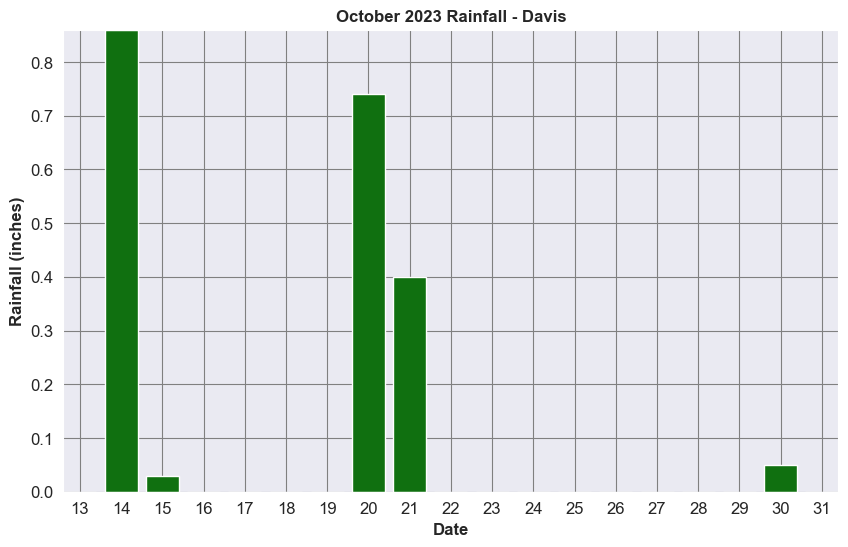

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
import numpy as np
import getDays
import seaborn as sns

sta = ['Davis']

for qwe in sta:        
       
    df['Date'] = df['Date'].astype(int)
    df['High'] = df["High"].astype(int)
    df['Low'] = df["Low"].astype(int)
    df['Rainfall'] = df["Rainfall"].astype(float)   
            
    path1 = '/var/www/html/trclimate/'    
    
    sns.set_style("dark", {'grid.color': 'gray'})
    plt.figure(figsize=(10, 6))
    plt.xlim(1, date)
    plt.xticks(fontsize=12)
    plt.xlabel('Date', fontsize=12, fontweight ='bold')
    plt.yticks(fontsize=12)
    sns.barplot(data = df, x = 'Date', y = 'Rainfall', color = 'g', errorbar = None, orient = "vertical")
    plt.autoscale(enable = True, axis = 'both', tight = True)
    plt.grid(True)
    plt.ylabel('Rainfall (inches)', fontsize=12, fontweight ='bold')
    plt.title(f'{month} {year} Rainfall - {qwe}', fontsize=12, fontweight ='bold')
    plt.savefig(f'{path1}Rain_test_{qwe}')      